In [ ]:
pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines3 gym-anytrading gym

### Import Data

In [1]:
import yfinance as yf
import pandas as pd

In [2]:
btc = yf.download('BTC-USD', start='2014-01-01',end='2023-11-07')
btc

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2023-11-01,34657.273438,35527.929688,34170.691406,35437.253906,35437.253906,22446272005
2023-11-02,35441.578125,35919.843750,34401.574219,34938.242188,34938.242188,20998158544
2023-11-03,34942.472656,34942.472656,34133.441406,34732.324219,34732.324219,17158456701


In [3]:
btc.index = pd.to_datetime(btc.index)

### Create Env

In [4]:
%env PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

env: PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python


In [5]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
env = gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)
env.signal_features

d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "


array([[ 4.57334015e+02,  0.00000000e+00],
       [ 4.24440002e+02, -3.28940125e+01],
       [ 3.94795990e+02, -2.96440125e+01],
       [ 4.08903992e+02,  1.41080017e+01],
       [ 3.98821014e+02, -1.00829773e+01],
       [ 4.02152008e+02,  3.33099365e+00],
       [ 4.35790985e+02,  3.36389771e+01],
       [ 4.23204987e+02, -1.25859985e+01],
       [ 4.11574005e+02, -1.16309814e+01],
       [ 4.04424988e+02, -7.14901733e+00],
       [ 3.99519989e+02, -4.90499878e+00],
       [ 3.77181000e+02, -2.23389893e+01],
       [ 3.75467010e+02, -1.71398926e+00],
       [ 3.86944000e+02,  1.14769897e+01],
       [ 3.83614990e+02, -3.32901001e+00],
       [ 3.75071991e+02, -8.54299927e+00],
       [ 3.59511993e+02, -1.55599976e+01],
       [ 3.28865997e+02, -3.06459961e+01],
       [ 3.20510010e+02, -8.35598755e+00],
       [ 3.30079010e+02,  9.56900024e+00],
       [ 3.36187012e+02,  6.10800171e+00],
       [ 3.52940002e+02,  1.67529907e+01],
       [ 3.65026001e+02,  1.20859985e+01],
       [ 3.

In [7]:
env.action_space

Discrete(2)

In [8]:
env.observation_space

Box(-inf, inf, (5, 2), float64)

info {'total_reward': -83.64199829101562, 'total_profit': 0.5694900340507314, 'position': 0}


d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:188: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  "Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information."
d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:

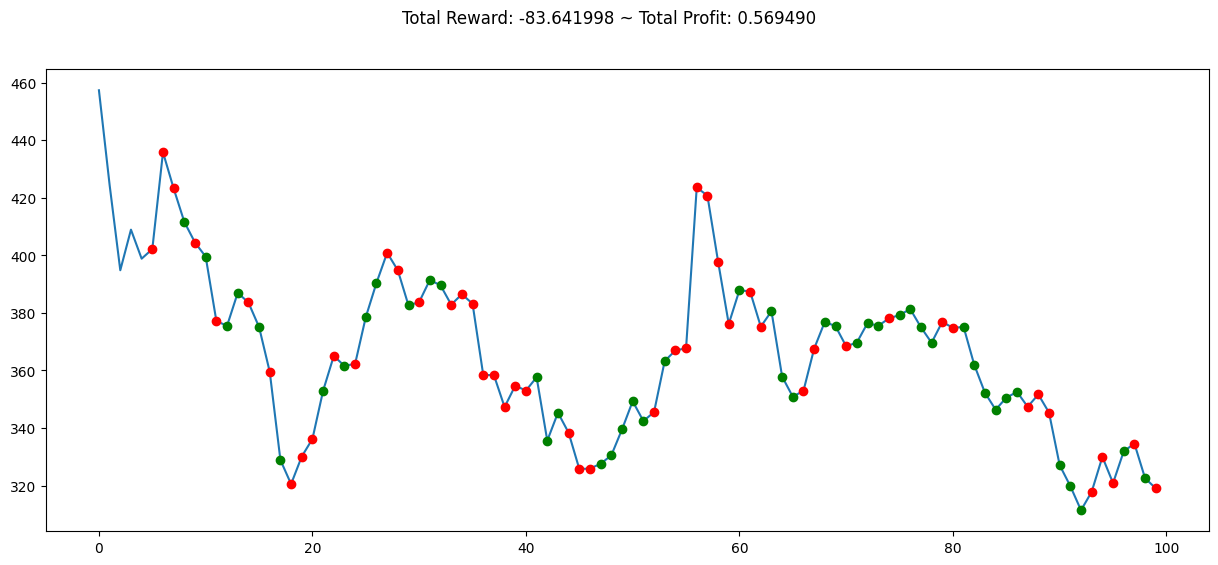

In [9]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

### Train Model on Env

In [11]:
env_maker = lambda: gym.make('stocks-v0', df=btc, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])
model = A2C('MlpPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 1594     |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.517   |
|    explained_variance | 0        |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -12.3    |
|    value_loss         | 204      |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 1658     |
|    iterations         | 200      |
|    time_elapsed       | 0        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.47    |
|    explained_variance | 0.000757 |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | 2.22     |
|    value_loss      

### Evaluation

In [12]:
env = gym.make('stocks-v0', df=btc, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.0, 'total_profit': 0.8138362202603063, 'position': 1}


d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:32: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 2)
  "A Box observation space has an unconventional shape (neither an image, nor a 1D vector). "
d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\utils\passive_env_checker.py:175: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  "Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator."
d:\machine_learning\projects\crypot_machine_learning\.venv\lib\site-packages\gym\ut

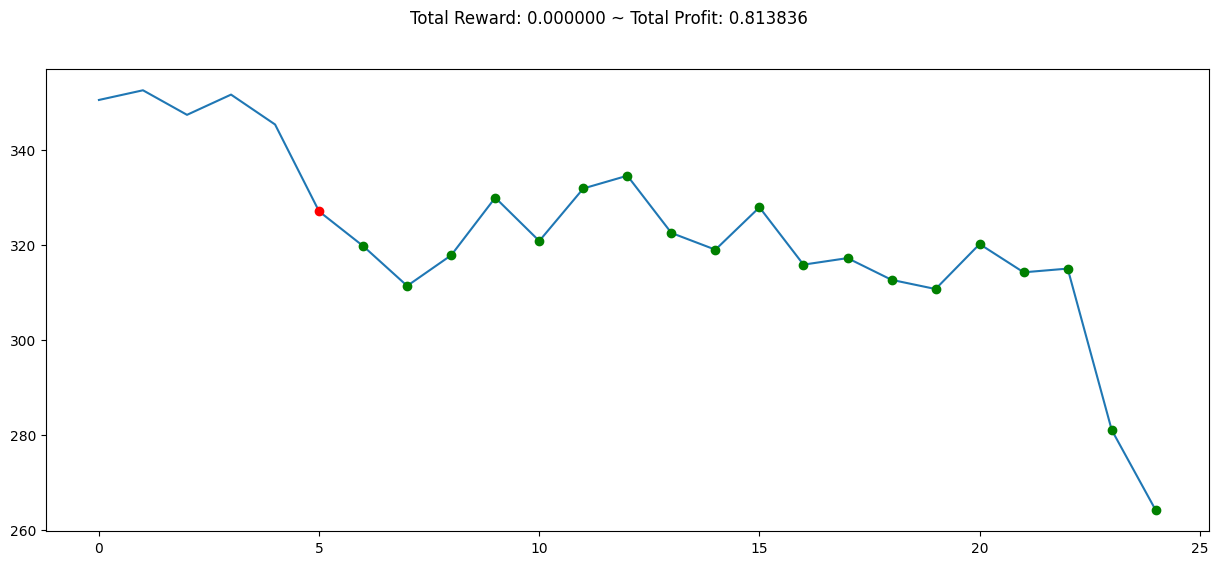

In [13]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()